### 1. Data Exploration

The goal is to get an overview of the data, figure out the shape, data types, and potential data quality issues.

In [1]:
import pandas as pd

# Load data
df = pd.read_csv("/Users/anaghabhole/Documents/Projects/DataScience-and-Quant-Portfolio/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Quick look
print(df.shape)
df.head()


(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 1.1. High-Level Insights

In [2]:

# Check for null values:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
# Basic statistics:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Data types (identify categorical vs. numerical):
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### 1.2. Target Variable Distribution
Churn is often a minority class. Let’s see the distribution:

Typically, you’ll see something like:

No: ~73%
Yes: ~27%
This imbalance is crucial to keep in mind for modeling.

In [5]:
print(df["Churn"].value_counts(normalize=True) * 100)


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


#### 1.3. Exploratory Plots

Using matplotlib or seaborn can help identify trends:

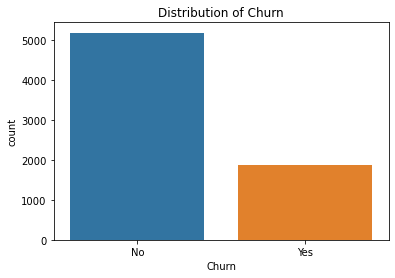

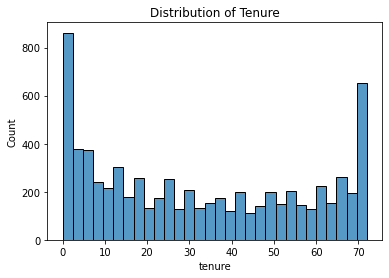

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of churn
sns.countplot(x="Churn", data=df)
plt.title("Distribution of Churn")
plt.show()

# Hist plot of tenure
sns.histplot(df["tenure"], bins=30)
plt.title("Distribution of Tenure")
plt.show()


### 2. Data Preprocessing
Common data issues you’ll face:

Missing Values
Data Encoding (categorical to numeric)
Scaling (if needed, e.g., for distance-based models or neural networks)

#### 2.1. Handle Missing Data
In the Telco dataset, TotalCharges can have missing or blank values that are actually spaces. Convert them to numeric, and handle them (drop or impute):

In [7]:
# Convert 'TotalCharges' to numeric, coerce errors into NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing TotalCharges (small number of rows)
df.dropna(subset=["TotalCharges"], inplace=True)


Identify & Resolve Missing or Infinite Values. Check for NaN (Missing) Values

In [8]:
# Count total missing values in each column
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
df.dropna(inplace=True)


In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
import numpy as np

print(df.isna().sum().sum())  # Should be 0
print(df.replace([np.inf, -np.inf], np.nan).isna().sum().sum())  # Should also be 0


0
0


#### 2.2. Encode Categorical Variables
We have columns like "gender", "Partner", "Dependents", "PhoneService", etc. We can do:


Label Encoding for binary columns (Yes/No).

One-Hot Encoding for multi-category columns (InternetService, Contract, PaymentMethod, etc.).

In [12]:
# Example: Simple map for binary columns
binary_cols = ["Partner", "Dependents", "PhoneService", 
               "MultipleLines", "OnlineSecurity", "OnlineBackup", 
               "DeviceProtection", "TechSupport", "StreamingTV", 
               "StreamingMovies", "PaperlessBilling", "Churn"]

for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# Example: One-Hot Encoding
multi_cat_cols = ["InternetService", "Contract", "PaymentMethod"]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# Gender binary map
df["gender"] = df["gender"].map({"Female": 1, "Male": 0})
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,NaN,0.0,1.0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0.0,1.0,0.0,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0.0,1.0,1.0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,NaN,1.0,0.0,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0.0,0.0,0.0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1.0,1.0,0.0,...,84.80,1990.50,0,0,0,1,0,0,0,1
7039,2234-XADUH,1,0,1,1,72,1,1.0,0.0,1.0,...,103.20,7362.90,0,1,0,1,0,1,0,0
7040,4801-JZAZL,1,0,1,1,11,0,NaN,1.0,0.0,...,29.60,346.45,0,0,0,0,0,0,1,0
7041,8361-LTMKD,0,1,1,0,4,1,1.0,0.0,0.0,...,74.40,306.60,1,1,0,0,0,0,0,1


#### 3.3. Drop Unnecessary Columns

Often "customerID" is just an identifier and doesn’t help with prediction:

In [13]:
df.drop(["customerID"], axis=1, inplace=True)


#### 3.4. Feature Scaling

For tree-based models (Random Forest, XGBoost, LightGBM), scaling is less critical. However, for Logistic Regression, scaling can help. 

In [14]:
from sklearn.preprocessing import StandardScaler

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.280248,0,NaN,0.0,1.0,0.0,...,-1.161694,-0.994194,0,0,0,0,0,0,1,0
1,0,0,0,0,0.064303,1,0.0,1.0,0.0,1.0,...,-0.260878,-0.173740,0,0,0,1,0,0,0,1
2,0,0,0,0,-1.239504,1,0.0,1.0,1.0,0.0,...,-0.363923,-0.959649,1,0,0,0,0,0,0,1
3,0,0,0,0,0.512486,0,NaN,1.0,0.0,1.0,...,-0.747850,-0.195248,0,0,0,1,0,0,0,0
4,1,0,0,0,-1.239504,1,0.0,0.0,0.0,0.0,...,0.196178,-0.940457,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,-0.343137,1,1.0,1.0,0.0,1.0,...,0.664868,-0.129180,0,0,0,1,0,0,0,1
7039,1,0,1,1,1.612573,1,1.0,0.0,1.0,1.0,...,1.276493,2.241056,0,1,0,1,0,1,0,0
7040,1,0,1,1,-0.872808,0,NaN,1.0,0.0,0.0,...,-1.170004,-0.854514,0,0,0,0,0,0,1,0
7041,0,1,1,0,-1.158016,1,1.0,0.0,0.0,0.0,...,0.319168,-0.872095,1,1,0,0,0,0,0,1


In [15]:
df.dropna(inplace=True)

### 3. Feature Engineering

Feature engineering can significantly boost performance. Some ideas:


Interaction Features:

E.g., combine tenure and MonthlyCharges


In [16]:
df["MonthlyChargePerTenure"] = df["MonthlyCharges"] / (df["tenure"] + 1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyChargePerTenure
1,0,0,0,0,0.064303,1,0.0,1.0,0.0,1.0,...,-0.173740,0,0,0,1,0,0,0,1,-0.245116
2,0,0,0,0,-1.239504,1,0.0,1.0,1.0,0.0,...,-0.959649,1,0,0,0,0,0,0,1,1.519487
4,1,0,0,0,-1.239504,1,0.0,0.0,0.0,0.0,...,-0.940457,1,1,0,0,0,0,1,0,-0.819102
5,1,0,0,0,-0.995040,1,1.0,0.0,0.0,1.0,...,-0.645369,1,1,0,0,0,0,1,0,233.580837
6,0,0,0,1,-0.424625,1,1.0,0.0,1.0,0.0,...,-0.147313,0,1,0,0,0,1,0,0,1.403958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,0,0,0,0,-0.546857,1,0.0,0.0,0.0,0.0,...,-0.347744,0,1,0,0,0,0,0,0,1.019770
7038,0,0,1,1,-0.343137,1,1.0,1.0,0.0,1.0,...,-0.129180,0,0,0,1,0,0,0,1,1.012187
7039,1,0,1,1,1.612573,1,1.0,0.0,1.0,1.0,...,2.241056,0,1,0,1,0,1,0,0,0.488596
7041,0,1,1,0,-1.158016,1,1.0,0.0,0.0,0.0,...,-0.872095,1,1,0,0,0,0,0,1,-2.019843


### 4. Train-Test Split


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(["Churn"], axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train)


      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3725       1              0        0           0 -1.280248             1   
6454       1              0        0           0  0.349510             1   
3236       0              0        0           0 -0.669089             1   
758        1              0        0           1 -0.709833             1   
5689       0              0        0           0 -1.117272             1   
...      ...            ...      ...         ...       ...           ...   
6452       0              0        0           0 -0.709833             1   
650        1              0        0           0 -1.198760             1   
4488       1              1        1           0  0.390254             1   
5467       1              0        0           0  0.838438             1   
1215       1              0        1           1 -1.198760             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
3725       

### 5. Modeling

#### 5.1. Baseline Models


In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


#### 5.2. Performance Evaluation

Since churn is often imbalanced, we look at:


Precision: Out of predicted churners, how many are correct?

Recall (a.k.a Sensitivity): Out of actual churners, how many did we catch?

F1 Score: Harmonic mean of precision and recall.


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       646
           1       0.64      0.60      0.62       321

    accuracy                           0.76       967
   macro avg       0.73      0.72      0.72       967
weighted avg       0.75      0.76      0.76       967

[[539 107]
 [127 194]]


#### 5.3. Advanced Models (Random Forest, XGBoost, LightGBM)

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.79      0.83      0.81       646
           1       0.63      0.57      0.59       321

    accuracy                           0.74       967
   macro avg       0.71      0.70      0.70       967
weighted avg       0.74      0.74      0.74       967

[[537 109]
 [139 182]]


In [21]:
# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    random_state=42,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


/Users/anaghabhole/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.79      0.81      0.80       646
           1       0.60      0.58      0.59       321

    accuracy                           0.73       967
   macro avg       0.70      0.69      0.70       967
weighted avg       0.73      0.73      0.73       967

[[525 121]
 [136 185]]


In [22]:
# LightGBM
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    random_state=42
)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
print(classification_report(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))



              precision    recall  f1-score   support

           0       0.79      0.81      0.80       646
           1       0.60      0.58      0.59       321

    accuracy                           0.73       967
   macro avg       0.70      0.69      0.70       967
weighted avg       0.73      0.73      0.73       967

[[523 123]
 [135 186]]


### 6. Model Evaluation and Optimization

#### 6.1. Performance Comparison


In [23]:
from sklearn.metrics import f1_score

print("Logistic Regression F1:", f1_score(y_test, y_pred))
print("Random Forest F1:", f1_score(y_test, y_pred_rf))
print("XGBoost F1:", f1_score(y_test, y_pred_xgb))
print("LightGBM F1:", f1_score(y_test, y_pred_lgb))


Logistic Regression F1: 0.6237942122186495
Random Forest F1: 0.5947712418300655
XGBoost F1: 0.5901116427432216
LightGBM F1: 0.5904761904761904


#### 6.2. Hyperparameter Tuning

Use GridSearchCV or RandomizedSearchCV to optimize parameters:

In [24]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 0.3],
    "n_estimators": [50, 100, 200],
}
xgb_search = RandomizedSearchCV(
    xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False),
    param_distributions=param_dist,
    scoring="f1",
    cv=3,
    n_iter=5,
    random_state=42
)
xgb_search.fit(X_train, y_train)

print("Best params:", xgb_search.best_params_)
best_xgb = xgb_search.best_estimator_
best_xgb


Best params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [25]:
y_pred_best_xgb = best_xgb.predict(X_test)
print("Tuned XGB F1:", f1_score(y_test, y_pred_best_xgb))


Tuned XGB F1: 0.6356340288924559


### 7. Handling Class Imbalance

Class Weighting: In logistic regression or tree-based models, set class_weight='balanced' or manually provide weighting.

Oversampling (e.g., SMOTE) or Undersampling. For example:

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Then train your models with X_train_sm, y_train_sm
best_xgb.fit(X_train_sm, y_train_sm)
y_pred_best_sm = best_xgb.predict(X_test)

print(classification_report(y_test, y_pred_best_sm))
print(confusion_matrix(y_test, y_pred_best_sm))


              precision    recall  f1-score   support

           0       0.85      0.75      0.80       646
           1       0.59      0.73      0.65       321

    accuracy                           0.74       967
   macro avg       0.72      0.74      0.73       967
weighted avg       0.76      0.74      0.75       967

[[485 161]
 [ 87 234]]


### 8. Interpretability

Understanding why a customer is predicted to churn is critical for business stakeholders.


Feature Importance (for tree-based models):

In [27]:
import numpy as np

importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

for i in indices[:10]:
    print(features[i], importances[i])


Contract_One year 0.15588479
OnlineSecurity 0.14924093
Contract_Two year 0.12165366
InternetService_Fiber optic 0.11780809
TechSupport 0.061886385
PaymentMethod_Electronic check 0.05496646
OnlineBackup 0.04884021
tenure 0.04433681
DeviceProtection 0.04309435
MultipleLines 0.03265599


SHAP values: Tools like SHAP can give local interpretability for each prediction.

* Global interpretability helps you understand overall feature importance and patterns driving churn vs. non-churn.
* Local interpretability allows you to dive into individual customers and see precisely which features drive their predictions.

This transparency often builds trust with business stakeholders and gives actionable insights into why certain customers are at risk of churning.

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


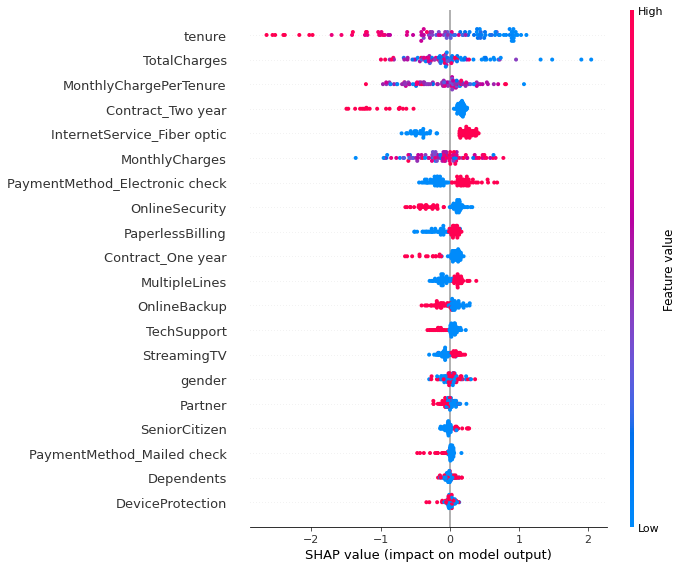

In [28]:
import xgboost as xgb
import shap

# 1. Train your XGBoost model
best_xgb = xgb.XGBClassifier(eval_metric="logloss", random_state=42, use_label_encoder=False)
best_xgb.fit(X_train, y_train)

# 2. Create the explainer
explainer = shap.TreeExplainer(best_xgb)

# 3. Compute SHAP values on a sample of the test set
X_test_sample = X_test.sample(n=100, random_state=42)
shap_values = explainer.shap_values(X_test_sample)

# 4. SHAP Summary Plot
shap.summary_plot(shap_values, X_test_sample)




In [29]:
import pickle

with open("best_xgb.pkl", "wb") as f:
    pickle.dump(best_xgb, f)
